### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
tf.__version__

'1.15.0'

### Collect Data

In [0]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(trainY)
test_labels = to_categorical(testY)

In [0]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
First 5 examples now are:  [9 0 0 3 0]


In [0]:
print(train_labels.shape)
print('First 5 examples now are: ', train_labels[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
images_to_display = trainX[0:10]
images_to_display

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [0]:
len(images_to_display)

10

In [0]:
images_to_display.dtype

dtype('uint8')

In [0]:
images_to_display1 = images_to_display/255

In [0]:
images_to_display1.shape

(10, 28, 28)

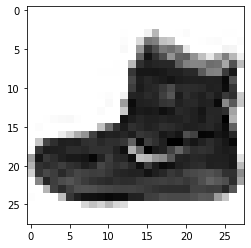

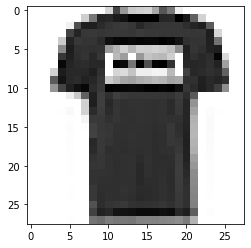

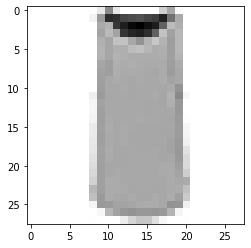

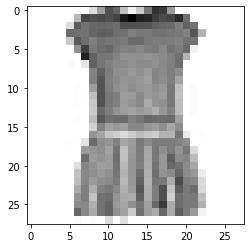

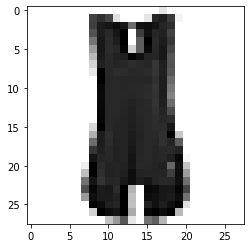

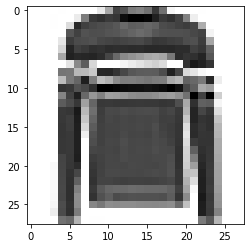

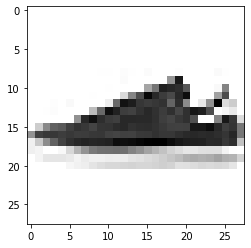

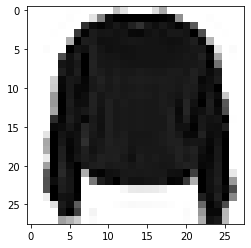

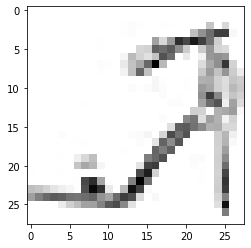

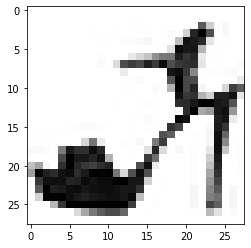

In [0]:
import matplotlib.pyplot as plt 
import numpy as np
#fig, axes = plt.subplots(3,3,figsize=(5,5))
#for x in [len(images_to_display)]:
for x in range(10):
  #ax=axes
  #images_to_display1 = (np.reshape(images_to_display[x],(28,28))*255).astype(np.uint8)
  plt.imshow(images_to_display1[x], cmap = plt.cm.binary)
  plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
model1 = tf.keras.models.Sequential()  # For the first layer, to receive the information 
model1.add(tf.keras.layers.Reshape((784,),input_shape = (28,28,)))  # Reshaping for providing the input 

model1.add(tf.keras.layers.Dense(10,activation='softmax'))
model1.compile(optimizer='sgd', loss= 'categorical_crossentropy',metrics = ['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Execute the model using model.fit()

In [0]:
model1.fit(trainX,train_labels,validation_data = (testX,test_labels), epochs = 50, batch_size= trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 9us/sample - loss: 243.8430 - acc: 0.0538 - val_loss: 4236.4482 - val_acc: 0.2033
Epoch 2/50
60000/60000 [==============================] - 0s 4us/sample - loss: 4227.7217 - acc: 0.2084 - val_loss: 9876.5684 - val_acc: 0.1811
Epoch 3/50
60000/60000 [==============================] - 0s 4us/sample - loss: 9811.1318 - acc: 0.1815 - val_loss: 14353.8301 - val_acc: 0.2391
Epoch 4/50
60000/60000 [==============================] - 0s 4us/sample - loss: 14240.5566 - acc: 0.2439 - val_loss: 18444.3574 - val_acc: 0.2859
Epoch 5/50
60000/60000 [==============================] - 0s 4us/sample - loss: 18374.1191 - acc: 0.2892 - val_loss: 14153.8594 - val_acc: 0.2687
Epoch 6/50
60000/60000 [==============================] - 0s 4us/sample - loss: 14100.5762 - acc: 0.2694 - val_loss: 13631.3184 - val_acc: 0.2873
Epoch 7/50
60000/60000 [==============================] - 0s 4us/sample - loss: 

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
model1 = tf.keras.models.Sequential()  # For the first layer, to receive the information 
model1.add(tf.keras.layers.Reshape((784,),input_shape = (28,28,)))  # Reshaping for providing the input 

model1.add(tf.keras.layers.BatchNormalization())     
model1.add(tf.keras.layers.Dense(10,activation='softmax'))
model1.compile(optimizer='sgd', loss= 'categorical_crossentropy',metrics = ['accuracy'])

### Execute the model

In [0]:
model1.fit(trainX,train_labels,validation_data = (testX,test_labels), epochs = 50, batch_size= trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 18us/sample - loss: 2.9831 - acc: 0.0994 - val_loss: 17.2292 - val_acc: 0.1426
Epoch 2/50
60000/60000 [==============================] - 1s 12us/sample - loss: 2.6825 - acc: 0.1443 - val_loss: 10.7635 - val_acc: 0.1867
Epoch 3/50
60000/60000 [==============================] - 1s 12us/sample - loss: 2.4329 - acc: 0.1967 - val_loss: 7.9323 - val_acc: 0.2231
Epoch 4/50
60000/60000 [==============================] - 1s 12us/sample - loss: 2.2267 - acc: 0.2489 - val_loss: 6.3243 - val_acc: 0.2503
Epoch 5/50
60000/60000 [==============================] - 1s 13us/sample - loss: 2.0569 - acc: 0.2994 - val_loss: 5.3026 - val_acc: 0.2814
Epoch 6/50
60000/60000 [==============================] - 1s 12us/sample - loss: 1.9170 - acc: 0.3473 - val_loss: 4.6149 - val_acc: 0.3060
Epoch 7/50
60000/60000 [==============================] - 1s 12us/sample - loss: 1.8012 - acc: 0.3913 - val_loss: 

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
# SGD need to be imported 
from keras.optimizers import SGD


model1 = tf.keras.models.Sequential()  # For the first layer, to receive the information 
model1.add(tf.keras.layers.Reshape((784,),input_shape = (28,28,)))  # Reshaping for providing the input 

model1.add(tf.keras.layers.BatchNormalization())     
model1.add(tf.keras.layers.Dense(10,activation='softmax'))
gd = SGD(lr=0.001)
model1.compile(optimizer='sgd',loss= 'categorical_crossentropy',metrics = ['accuracy'])


In [0]:
model1.fit(trainX,train_labels,validation_data = (testX,test_labels), epochs = 50, batch_size= trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 14us/sample - loss: 3.1459 - acc: 0.0630 - val_loss: 22.8045 - val_acc: 0.1247
Epoch 2/50
60000/60000 [==============================] - 1s 12us/sample - loss: 2.8077 - acc: 0.0925 - val_loss: 14.3165 - val_acc: 0.1432
Epoch 3/50
60000/60000 [==============================] - 1s 12us/sample - loss: 2.5336 - acc: 0.1336 - val_loss: 10.5918 - val_acc: 0.1619
Epoch 4/50
60000/60000 [==============================] - 1s 12us/sample - loss: 2.3141 - acc: 0.1858 - val_loss: 8.4792 - val_acc: 0.1830
Epoch 5/50
60000/60000 [==============================] - 1s 12us/sample - loss: 2.1381 - acc: 0.2379 - val_loss: 7.1106 - val_acc: 0.2047
Epoch 6/50
60000/60000 [==============================] - 1s 12us/sample - loss: 1.9957 - acc: 0.2843 - val_loss: 6.1408 - val_acc: 0.2232
Epoch 7/50
60000/60000 [==============================] - 1s 13us/sample - loss: 1.8787 - acc: 0.3223 - val_loss:

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
model2 = tf.keras.models.Sequential()  # For the first layer, to receive the information 
model2.add(tf.keras.layers.Reshape((784,),input_shape = (28,28,)))  # Reshaping for providing the input 

model2.add(tf.keras.layers.BatchNormalization())  

In [0]:
model2.add(tf.keras.layers.Dense(100,activation = 'sigmoid'))

In [0]:
model2.add(tf.keras.layers.Dense(100,activation = 'sigmoid'))

In [0]:
model2.add(tf.keras.layers.Dense(10,activation = 'sigmoid'))

In [0]:
model2.add(tf.keras.layers.Dense(10,activation='softmax'))

## Review model

In [0]:
gd = SGD(lr=0.001)
model2.compile(optimizer='sgd',loss= 'categorical_crossentropy',metrics = ['accuracy'])

### Run the model

In [0]:
model1.fit(trainX,train_labels,validation_data = (testX,test_labels), epochs = 50, batch_size= trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 12us/sample - loss: 0.9200 - acc: 0.6857 - val_loss: 1.1790 - val_acc: 0.6407
Epoch 2/50
60000/60000 [==============================] - 1s 12us/sample - loss: 0.9148 - acc: 0.6874 - val_loss: 1.1653 - val_acc: 0.6430
Epoch 3/50
60000/60000 [==============================] - 1s 12us/sample - loss: 0.9098 - acc: 0.6892 - val_loss: 1.1521 - val_acc: 0.6459
Epoch 4/50
60000/60000 [==============================] - 1s 12us/sample - loss: 0.9049 - acc: 0.6911 - val_loss: 1.1393 - val_acc: 0.6483
Epoch 5/50
60000/60000 [==============================] - 1s 12us/sample - loss: 0.9002 - acc: 0.6929 - val_loss: 1.1271 - val_acc: 0.6509
Epoch 6/50
60000/60000 [==============================] - 1s 12us/sample - loss: 0.8955 - acc: 0.6946 - val_loss: 1.1153 - val_acc: 0.6527
Epoch 7/50
60000/60000 [==============================] - 1s 12us/sample - loss: 0.8910 - acc: 0.6964 - val_loss: 1.